<img src="iris.png">

**La base de datos Iris:** *este conjunto de datos contiene 50 muestras*

1-Para cada una de estas especies se midieron 4 rasgos de cada muestra

a) La longitud y ancho del sépalo y pétalo

### Librerias a utilizar ###

In [107]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

### Importamos la librería ###

In [108]:
iris = pd.read_csv("iris.csv")# en el caso que bajen la libreria en formato CVS
#iris = load_iris()
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [109]:
print('Información de dataset:')
print(iris.info())

Información de dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [110]:
print('Descripción del dataset:')
print(iris.describe())

Descripción del dataset:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [111]:
print('Distribución de las especies de Iris:')
print(iris.groupby('species').size())

Distribución de las especies de Iris:
species
setosa        50
versicolor    50
virginica     50
dtype: int64


### Visualización de los datos ###

#### Grafico Sépalo  - Longitud vs Ancho ###

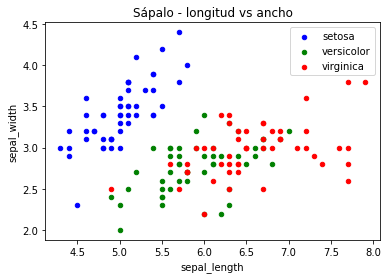

In [112]:
fig = iris[iris.species == 'setosa'].plot(kind='scatter', x='sepal_length', y='sepal_width',color='blue', label='setosa')

iris[iris.species == 'versicolor'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='green',label='versicolor',ax= fig )
iris[iris.species == 'virginica'].plot(kind='scatter',x='sepal_length', y='sepal_width', color ='red', label='virginica',ax= fig )

fig.set_label('Sépalo - longitud')
fig.set_label('Sépalo - ancho')
fig.set_title('Sápalo - longitud vs ancho')
plt.show()

#### Grafico Pétalo  - Longitud vs Ancho ###

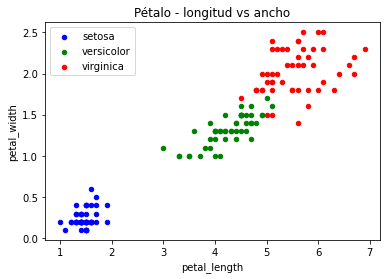

In [113]:
fig = iris[iris.species == 'setosa'].plot(kind='scatter', x='petal_length', y='petal_width',color='blue', label='setosa')

iris[iris.species == 'versicolor'].plot(kind='scatter', x='petal_length', y='petal_width', color='green',label='versicolor',ax= fig )
iris[iris.species == 'virginica'].plot(kind='scatter',x='petal_length', y='petal_width', color ='red', label='virginica',ax= fig )

fig.set_label('Pétalo - longitud')
fig.set_label('Pétalo - ancho')
fig.set_title('Pétalo - longitud vs ancho')
plt.show()

## Uso de algoritmos de clasificación ##

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Modelo con todos los datos ###

#### Separación de todos los datos con las características y las etiquetas o resultados ####

In [114]:
X =np.array(iris.drop(['species'],1))
y = np.array(iris['species'])

#### Separación de los datos de "train" en el entrenamiento y prueba para probar los algoritmos ####

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print('Son {} datos de entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 120 datos de entrenamiento y 30 datos para prueba


### Aplicando el modelo de Regresión Logística ###

In [128]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
Y_pred = LogReg.predict(X_test)

print('Accuracy Regresión Logística: {}'.format(LogReg.score(X_train,y_train)))

Accuracy Regresión Logística: 0.9666666666666667


C:\Users\ELEAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Aplicando el modelo de SVM ###

In [129]:
SuVeMa = SVC(kernel='linear')
SuVeMa.fit(X_train, y_train)
Y_pred = SuVeMa.predict(X_test)

print('Accuracy Maquína Soporte Vectorial: {}'.format(SuVeMa.score(X_train,y_train)))

Accuracy Maquína Soporte Vectorial: 0.9916666666666667


### Aplicando el modelo de K Vecinos mas cercanos ###

In [130]:
KNC = KNeighborsClassifier(n_neighbors=5)
KNC.fit(X_train, y_train)
Y_pred = KNC.predict(X_test)

print('Accuracy Vecino mas Cercano: {}'.format(KNC.score(X_train,y_train)))

Accuracy Vecino mas Cercano: 0.9833333333333333


### Aplicando el modelo de Arboles de decisión ###

In [131]:
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train, y_train)
Y_pred = Dtree.predict(X_test)

print('Accuracy Arbol de Decisión: {}'.format(Dtree.score(X_train,y_train)))

Accuracy Arbol de Decisión: 1.0


0.9333333333333333


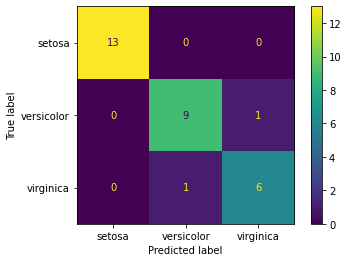

In [132]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

score = accuracy_score(y_test,Y_pred)
print(score)
cm  = confusion_matrix(y_test,Y_pred)

plot_confusion_matrix(
    Dtree,        # clasificador entrenado
    X_test,     # matriz de variables de entrada
    y_test);    # valor

In [133]:
print(cm)

[[13  0  0]
 [ 0  9  1]
 [ 0  1  6]]
